In [957]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [958]:
df = pd.read_excel('data.xlsx', sheet_name='Dulieu0205')    

In [959]:
df

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1
...,...,...,...,...,...,...,...
4665,0,27082,1736737,3345,HK2 (2022-2023),9.1,0
4666,0,27082,1736737,3206,HK1 (2023-2024),8.1,0
4667,0,27082,1736737,3591,HK1 (2023-2024),8.2,1
4668,0,27277,1737233,3320,HK2 (2022-2023),0.0,0


In [960]:
sub_df = pd.read_excel('data.xlsx',sheet_name='DS môn TC',header=1)

In [961]:
sub_df.head()

,HK,MaMonHoc,Tên Môn,HK.1,Thuoc KCNTT
0,2,3240,Hàm phức và phép biến đổi Laplace,2,0
1,2,3395,Logic học,2,0
2,2,3320,Phương pháp tính,2,0
3,2,3193,Toán ứng dụng,2,0
4,2,3345,Vật lý đại cương,2,0


In [962]:
import pandas as pd

# Giả sử df và sub_df đã được tạo và chứa dữ liệu

# Thực hiện merge để thêm cột HK từ sub_df vào df dựa trên MaMonHoc
df = pd.merge(df, sub_df[['MaMonHoc', 'HK']], on='MaMonHoc', how='left')

# Hiển thị kết quả
df.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HK
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,3
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,4
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,2
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,5
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,4


In [963]:
# xóa cột TenDot
df.drop('TenDot', axis=1, inplace=True)

In [964]:
# sort theo idsinhvien và học kì
df = df.sort_values(by=['IDSinhVien', 'HK'])

In [965]:
df.head(20)

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,DiemTongKet,Thuộc KCNTT,HK
2,1,25933,1677250,3395,8.9,0,2
0,1,25933,1677250,3197,8.0,0,3
1,1,25933,1677250,3203,7.6,0,4
4,1,25933,1677250,901,9.5,1,4
3,1,25933,1677250,1076,7.9,1,5
9,1,25933,1677250,3453,7.7,1,5
5,1,25933,1677250,3893,9.3,0,6
6,1,25933,1677250,4032,8.4,0,6
7,1,25933,1677250,1295,7.6,0,7
8,1,25933,1677250,1366,8.3,1,7


# EDA

In [966]:
# Kiểm tra kiểu dữ liệu và các giá trị thiếu
print(df.info())

# Kiểm tra giá trị null
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 4670 entries, 2 to 4669
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GioiTinh     4670 non-null   int64  
 1   IDLopHoc     4670 non-null   int64  
 2   IDSinhVien   4670 non-null   int64  
 3   MaMonHoc     4670 non-null   int64  
 4   DiemTongKet  4015 non-null   float64
 5   Thuộc KCNTT  4670 non-null   int64  
 6   HK           4670 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 291.9 KB
None
GioiTinh         0
IDLopHoc         0
IDSinhVien       0
MaMonHoc         0
DiemTongKet    655
Thuộc KCNTT      0
HK               0
dtype: int64


In [967]:
# Kiểm tra giá trị duy nhất trong các cột phân loại
print(df['GioiTinh'].value_counts())
print(df['IDLopHoc'].value_counts())
print(df['MaMonHoc'].value_counts())
print(df['Thuộc KCNTT'].value_counts())


GioiTinh
0    3579
1    1091
Name: count, dtype: int64
IDLopHoc
26421    634
26422    592
26420    580
26961    534
26153    480
26965    475
26150    405
26156    318
25933    302
27082    194
27277    156
Name: count, dtype: int64
MaMonHoc
1076     442
2031     441
3591     441
1276     393
3893     336
3345     323
3245     309
1295     295
3206     209
2329     176
3395     145
3197     121
3320     121
2330     118
3325     111
3196     105
10665     96
3443      91
2296      72
3217      54
3453      46
3894      35
1366      34
3205      32
901       30
3203      27
3193      17
3758      14
4032      12
3195      12
3285       7
3454       3
3194       1
3240       1
Name: count, dtype: int64
Thuộc KCNTT
0    3013
1    1657
Name: count, dtype: int64


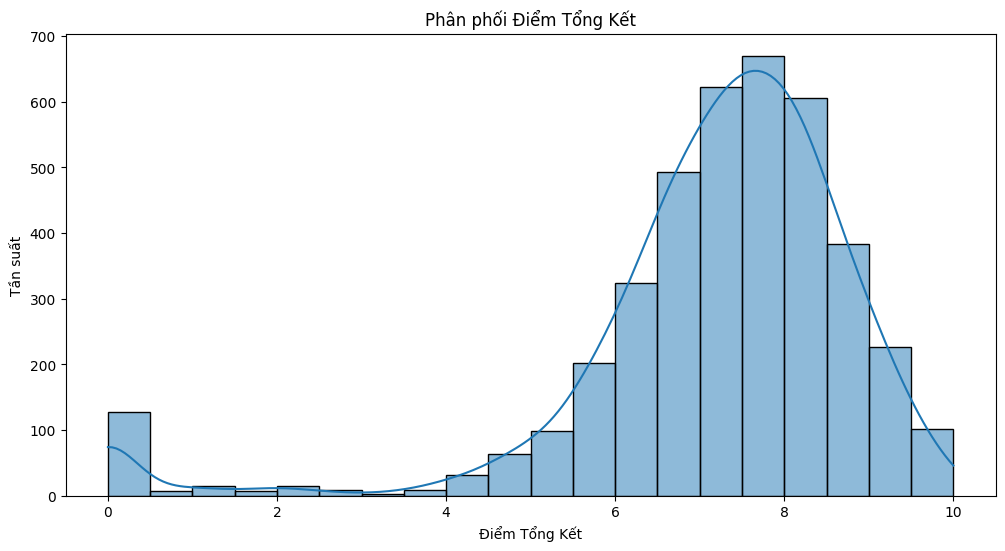

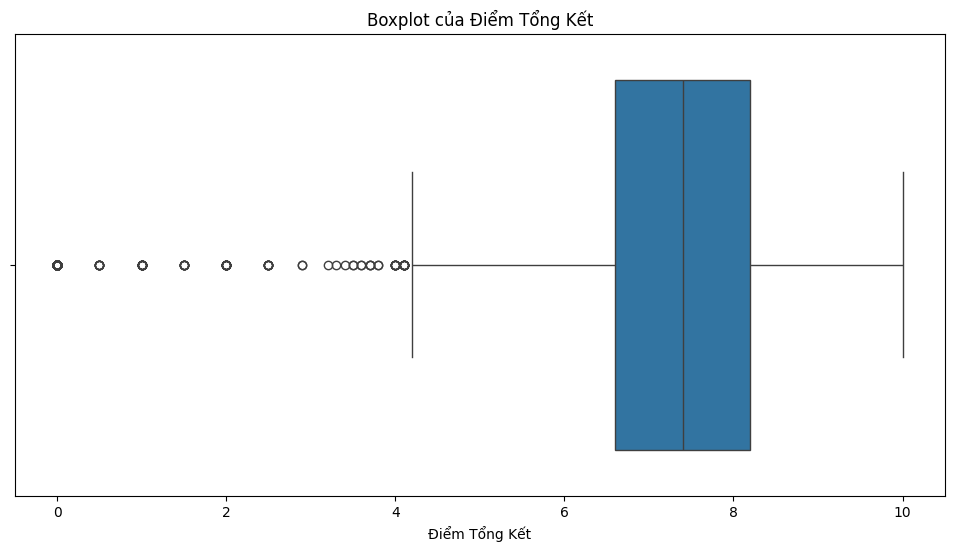

In [968]:
import matplotlib.pyplot as plt
import seaborn as sns

# Phân phối điểm tổng kết
plt.figure(figsize=(12, 6))
sns.histplot(df['DiemTongKet'], bins=20, kde=True)
plt.title('Phân phối Điểm Tổng Kết')
plt.xlabel('Điểm Tổng Kết')
plt.ylabel('Tần suất')
plt.show()

# Boxplot để kiểm tra phân phối và giá trị ngoại lai
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['DiemTongKet'])
plt.title('Boxplot của Điểm Tổng Kết')
plt.xlabel('Điểm Tổng Kết')
plt.show()


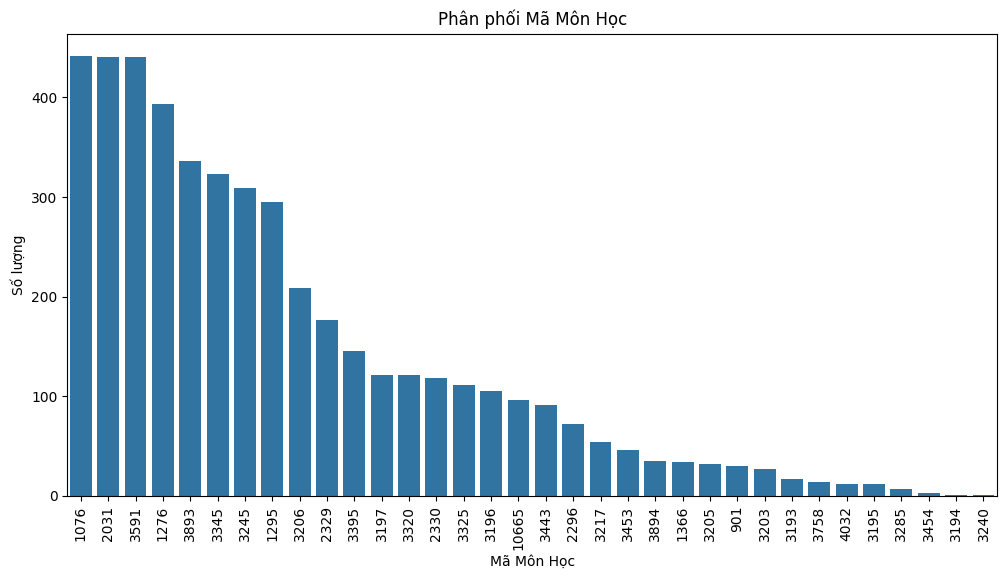

In [969]:
# Phân phối mã môn học
plt.figure(figsize=(12, 6))
sns.countplot(x='MaMonHoc', data=df, order=df['MaMonHoc'].value_counts().index)
plt.title('Phân phối Mã Môn Học')
plt.xlabel('Mã Môn Học')
plt.ylabel('Số lượng')
plt.xticks(rotation=90)
plt.show()


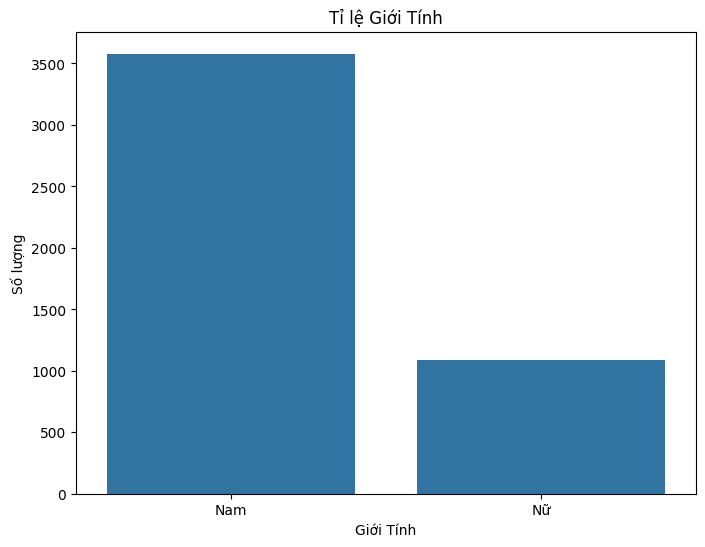

In [970]:
# Tỉ lệ giới tính
plt.figure(figsize=(8, 6))
sns.countplot(x=df['GioiTinh'])
plt.title('Tỉ lệ Giới Tính')
plt.xlabel('Giới Tính')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=['Nam', 'Nữ'])
plt.show()


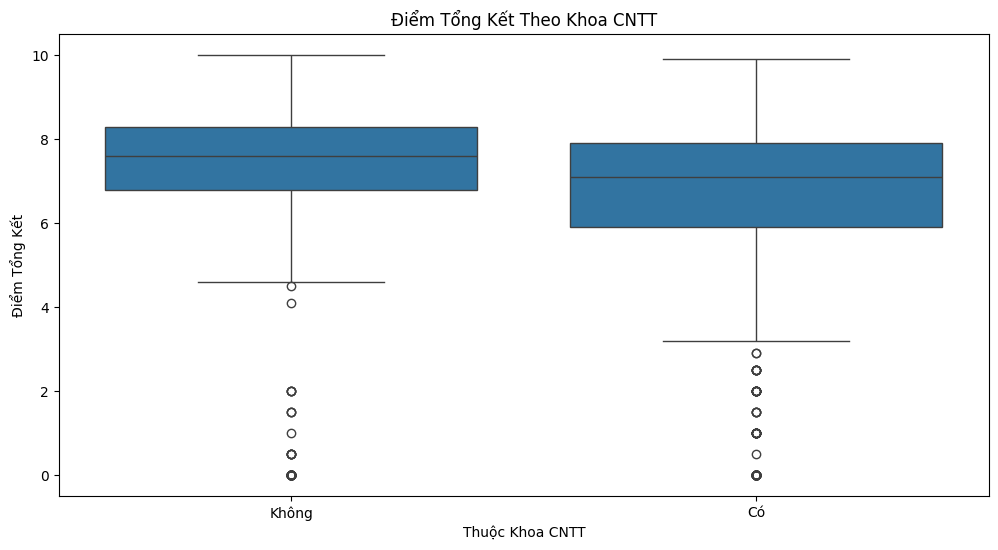

In [971]:
# So sánh điểm số của sinh viên thuộc và không thuộc Khoa CNTT
plt.figure(figsize=(12, 6))
sns.boxplot(x='Thuộc KCNTT', y='DiemTongKet', data=df)
plt.title('Điểm Tổng Kết Theo Khoa CNTT')
plt.xlabel('Thuộc Khoa CNTT')
plt.ylabel('Điểm Tổng Kết')
plt.xticks(ticks=[0, 1], labels=['Không', 'Có'])
plt.show()


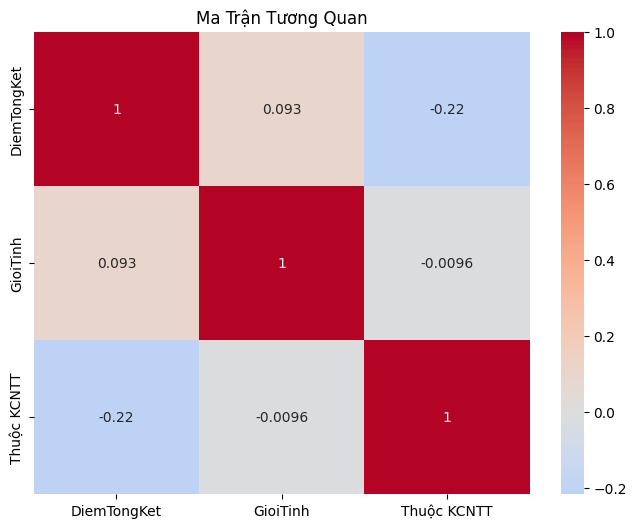

In [972]:
# Tính ma trận tương quan
corr_matrix = df[['DiemTongKet', 'GioiTinh', 'Thuộc KCNTT']].corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma Trận Tương Quan')
plt.show()


# Tiền xử lý dữ liệu

In [973]:
# tính điểm trung bình tổng kết của mỗi sinh viên
df['MeanDiemTongKet'] = df.groupby('IDSinhVien')['DiemTongKet'].transform('mean')

In [974]:
#thay thế các giá trị null bằng giá trị trung bình
df['DiemTongKet'] = df['DiemTongKet'].fillna(df['MeanDiemTongKet'])
#xóa cột MeanDiemTongKet
df.drop('MeanDiemTongKet', axis=1, inplace=True)

In [975]:
# def convert_score_to_group(score):
#     if score >= 8:
#         return 2
#     elif score >= 5:
#         return 1
#     else:
#         return 0

# df['ScoreGroup'] = df['DiemTongKet'].apply(convert_score_to_group)


In [976]:
def convert_score_to_group(score):
    if score >= 8.5:
        return 3  # Giỏi
    elif score >= 7:
        return 2  # Khá
    elif score >= 5:
        return 1  # Trung bình
    else:
        return 0  # Yếu

df['ScoreGroup'] = df['DiemTongKet'].apply(convert_score_to_group)


In [977]:
# mã hóa cột Mã môn học
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['MaMonHoc_enc'] = le.fit_transform(df['MaMonHoc'])

In [978]:
df

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,DiemTongKet,Thuộc KCNTT,HK,ScoreGroup,MaMonHoc_enc
2,1,25933,1677250,3395,8.9,0,2,3,24
0,1,25933,1677250,3197,8.0,0,3,2,13
1,1,25933,1677250,3203,7.6,0,4,2,14
4,1,25933,1677250,901,9.5,1,4,3,0
3,1,25933,1677250,1076,7.9,1,5,2,1
...,...,...,...,...,...,...,...,...,...
4665,0,27082,1736737,3345,9.1,0,2,3,23
4666,0,27082,1736737,3206,8.1,0,3,2,16
4667,0,27082,1736737,3591,8.2,1,5,2,28
4668,0,27277,1737233,3320,0.0,0,2,0,21


In [979]:
sequences = []
next_hk = []

for student_id, group in df.groupby('IDSinhVien'):
    subjects = group['MaMonHoc_enc'].tolist()
    scores = group['ScoreGroup'].tolist()
    kc_cntt = group['Thuộc KCNTT'].tolist()
    hks = group['HK'].tolist()

    for i in range(1, len(hks)):
        sequences.append([subjects[:i], scores[:i], kc_cntt[:i]])
        next_hk.append([subjects[i], scores[i]])


In [980]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sử dụng padding để đảm bảo tất cả các chuỗi có cùng chiều dài
subject_sequences = pad_sequences([seq[0] for seq in sequences], padding='post')
score_sequences = pad_sequences([seq[1] for seq in sequences], padding='post')
kc_cntt_sequences = pad_sequences([seq[2] for seq in sequences], padding='post')

X = np.stack([subject_sequences, score_sequences, kc_cntt_sequences], axis=-1)
y = np.array(next_hk)


In [981]:
X

array([[[24,  3,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[24,  3,  0],
        [13,  2,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[24,  3,  0],
        [13,  2,  0],
        [14,  2,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[23,  3,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[23,  3,  0],
        [16,  2,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[21,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]])

In [982]:
y

array([[13,  2],
       [14,  2],
       [ 0,  3],
       ...,
       [16,  2],
       [28,  2],
       [28,  0]])

In [983]:
X.shape, y.shape

((4079, 13, 3), (4079, 2))

In [984]:
#chia dữ liệu thành tập train và tập test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [985]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
# Xây dựng mô hình LSTM với regularization và dropout
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), 
               kernel_regularizer=regularizers.l2(0.01), return_sequences=False))
model.add(Dropout(0.3))  # Thêm Dropout
model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())  # Thêm BatchNormalization
model.add(Dropout(0.3))  # Thêm Dropout
model.add(Dense(2))  # 2 đầu ra

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.0003), loss='mse', metrics=['accuracy'])


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [986]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4155 - loss: 150.5606 - val_accuracy: 0.8668 - val_loss: 149.0562
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6147 - loss: 154.2764 - val_accuracy: 0.6646 - val_loss: 146.1700
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6429 - loss: 140.4950 - val_accuracy: 0.5727 - val_loss: 147.0027
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6490 - loss: 129.3368 - val_accuracy: 0.6371 - val_loss: 135.1010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6412 - loss: 131.0019 - val_accuracy: 0.6386 - val_loss: 127.7498
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6448 - loss: 121.8296 - val_accuracy: 0.6202 - val_loss: 123.6139
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6522 - loss: 110.2977 - val_accuracy: 0.6064 - val_loss: 118.4232
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6838 - loss: 104.4

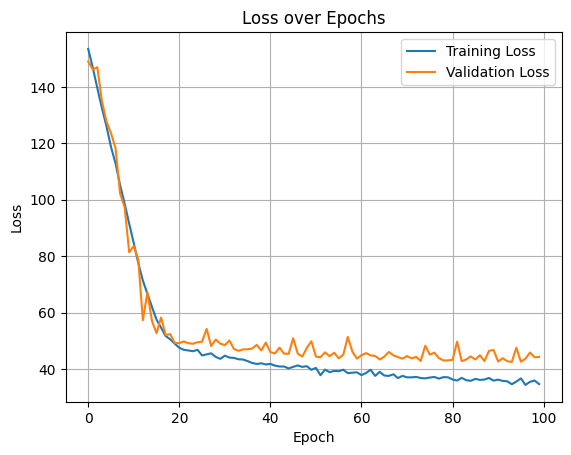

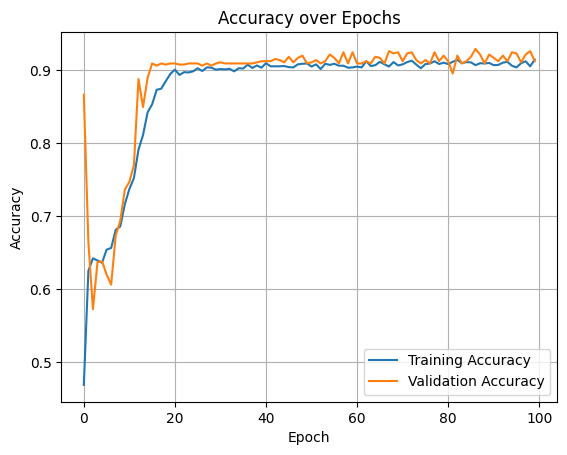

In [987]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [988]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8955 - loss: 43.4168 
Loss: 42.50333786010742
Accuracy: 0.8958333134651184


In [989]:
# Dự đoán
y_pred = model.predict(X_test)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [990]:
y_pred

array([[ 8.7053175,  1.5862556],
       [ 7.814682 ,  1.6529105],
       [10.803872 ,  1.5663819],
       ...,
       [ 6.506386 ,  1.7167172],
       [19.360168 ,  1.7352686],
       [ 6.9856334,  1.6690001]], dtype=float32)

In [991]:
# Làm tròn dự đoán để chuyển đổi thành lớp hoặc nhóm
y_pred_rounded = np.round(y_pred).astype(int)


In [992]:
y_pred_rounded

array([[ 9,  2],
       [ 8,  2],
       [11,  2],
       ...,
       [ 7,  2],
       [19,  2],
       [ 7,  2]])

In [993]:
# Hàm chuyển đổi mã môn học gốc thành mã hóa
def encode_ma_mon_hoc(ma_mon_hoc_list):
    return le.transform(ma_mon_hoc_list)


In [994]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Ví dụ dữ liệu cho các học kỳ trước đó (cho một sinh viên)
subjects_prev_goc = [3395, 3197]  # Mã môn học từ HK1 đến HK3
subjects_prev = encode_ma_mon_hoc(subjects_prev_goc)
scores_prev_goc = [8.9, 8.0]      # Điểm số nhóm từ HK1 đến HK3
scores_prev = [convert_score_to_group(score) for score in scores_prev_goc]
kc_cntt_prev = [0, 0 ]    # Thuộc KCNTT từ HK1 đến HK3

# Padding để đảm bảo tất cả các chuỗi có cùng chiều dài
max_length = X_train.shape[1]  # Chiều dài tối đa của chuỗi từ dữ liệu huấn luyện
subject_sequences = pad_sequences([subjects_prev], maxlen=max_length, padding='post')
score_sequences = pad_sequences([scores_prev], maxlen=max_length, padding='post')
kc_cntt_sequences = pad_sequences([kc_cntt_prev], maxlen=max_length, padding='post')

# Kết hợp dữ liệu đầu vào thành ma trận
X_new = np.stack([subject_sequences, score_sequences, kc_cntt_sequences], axis=-1)

# Dự đoán với dữ liệu mới
y_pred = model.predict(X_new)

# Nếu đầu ra là số thực và bạn muốn làm tròn
y_pred_rounded = np.round(y_pred).astype(int)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [995]:
import numpy as np


# Chọn chỉ số 0 để giải mã cột MaMonHoc_enc
# Chuyển đổi thành mảng một chiều
y_pred_first_col = y_pred_rounded[:, 0]  # Lấy cột đầu tiên

def decode_subject(encoded_values):
    # Đảm bảo rằng giá trị đầu vào là một mảng 1 chiều
    return le.inverse_transform(encoded_values.astype(int))

# Giải mã giá trị
decoded_subjects = decode_subject(y_pred_first_col)

print(f'Khuyến nghị môn học : {decoded_subjects}')
print('Khoảng điểm dự đoán là: ',y_pred_rounded[0][1])


Khuyến nghị môn học : [3325]
Khoảng điểm dự đoán là:  2
